In [78]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
ts = pd.read_csv('../Data/Processed/Outros/RR_Tratado_Íntegro.csv')

In [10]:
# SDNN
for c in ts.columns:
    print(c, ts[c].std().round(0))

M-A 42.0
M-B 28.0
S-A 36.0
S-B 23.0
M-C 18.0
M-D 29.0
S-C 21.0
S-D 34.0
M-E 27.0
M-F 37.0
S-E 25.0
S-F 36.0
All 71.0


In [30]:
#rMSSD
for c in ts.columns:
    casoA = pd.DataFrame()
    casoA['Esquerda'] = ts[c].dropna()
    casoA = (casoA.Esquerda - casoA.Esquerda.shift()) * (casoA.Esquerda - casoA.Esquerda.shift()) / (casoA.shape[0] - 1)
    print(c, (casoA.sum() ** 0.5).round(0))

M-A 12.0
M-B 5.0
S-A 10.0
S-B 4.0
M-C 3.0
M-D 6.0
S-C 4.0
S-D 5.0
M-E 6.0
M-F 10.0
S-E 5.0
S-F 11.0
All 98.0


In [37]:
#pnn50
for c in ts.columns:
    casoA = pd.DataFrame()
    casoA['Esquerda'] = ts[c].dropna()
    casoA = (casoA.Esquerda - casoA.Esquerda.shift()).dropna()
    casoB = casoA[casoA >= 50]

    print(c, (casoB.shape[0] / casoA.shape[0] * 100), '%')

M-A 0.41850732387816786 %
M-B 0.0 %
S-A 0.43620501635768816 %
S-B 0.0 %
M-C 0.0 %
M-D 0.0 %
S-C 0.0 %
S-D 0.029129041654529564 %
M-E 0.0 %
M-F 0.28578851649779163 %
S-E 0.0778816199376947 %
S-F 0.3946329913180742 %
All 26.7029355094639 %


In [179]:
def getPNN50(series):
    seriesShift = series.shift()
    diff = (series - seriesShift).dropna()
    n = len(diff)
    k = len(diff[diff > 50])
    try:
        r = (k / n) * 100
    except:
        r = 0
    return r

In [180]:
def getSDNN(series):
    return series.std().round(1)

In [181]:
def getRMSSD(series):
    seriesShift = series.shift()
    diff = (series - seriesShift).dropna()
    diff = diff ** 2
    diff = diff / len(diff)
    diff = diff.sum() ** 0.5
    return diff.round(1)

In [182]:
dict_ = {'path' : path, 'player1' : ['A', 'A', 'C', 'C', 'E', 'E'], 'player2' : ['B', 'B', 'D', 'D', 'F', 'F'], 
         'modo' : ['Multiplayer', 'Singleplayer', 'Multiplayer', 'Singleplayer', 'Multiplayer', 'Singleplayer'],
         'size' : 2}

106
61
69
62
69
20


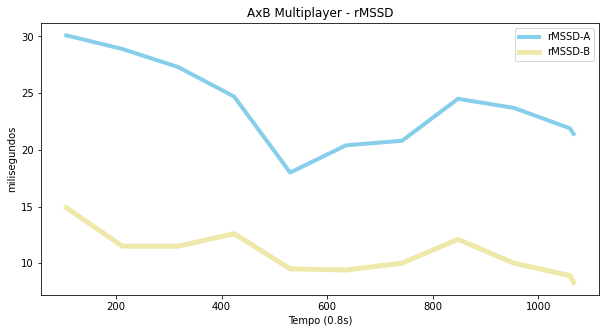

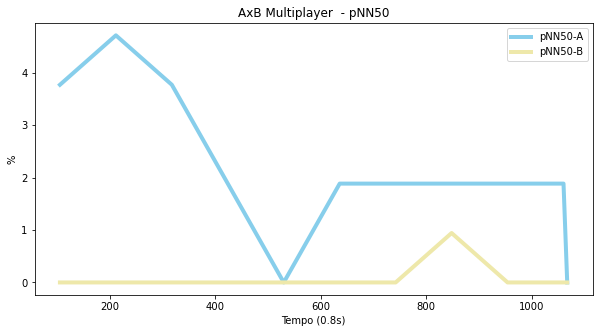

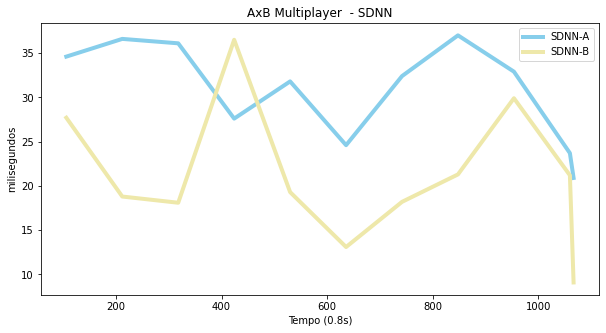

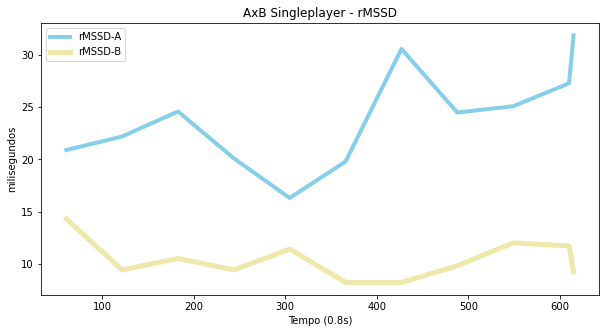

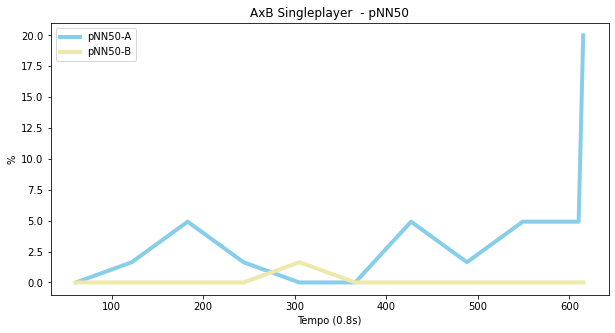

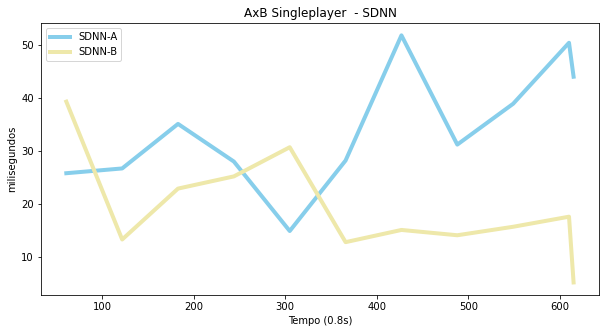

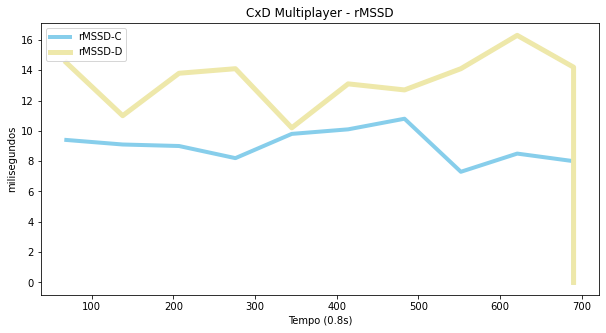

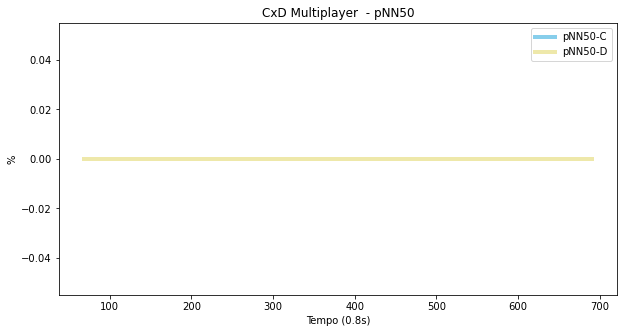

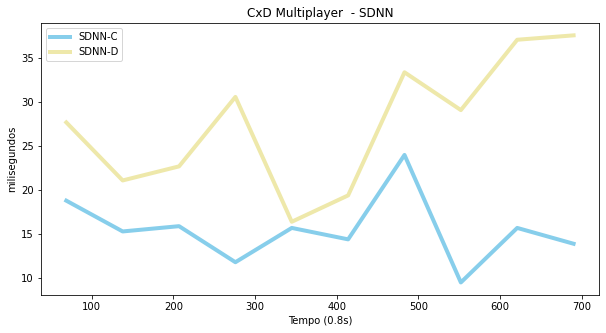

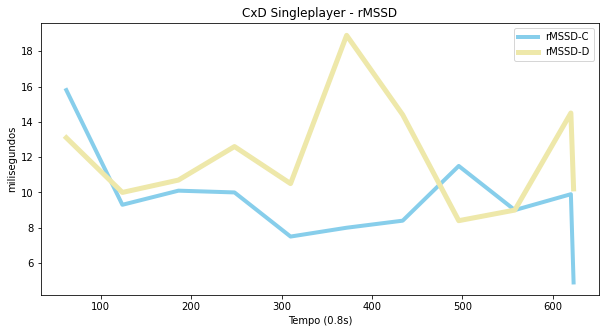

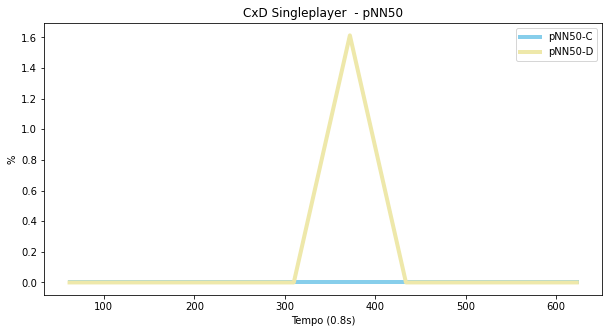

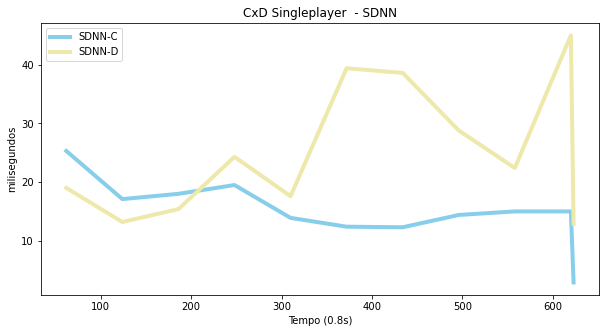

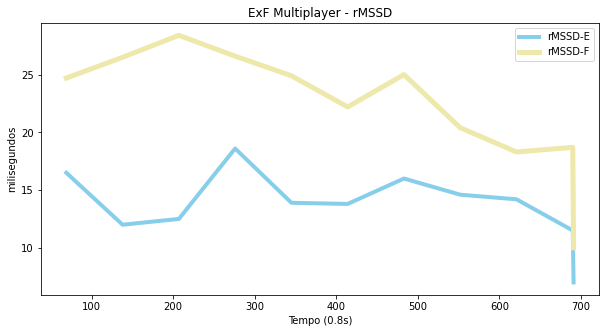

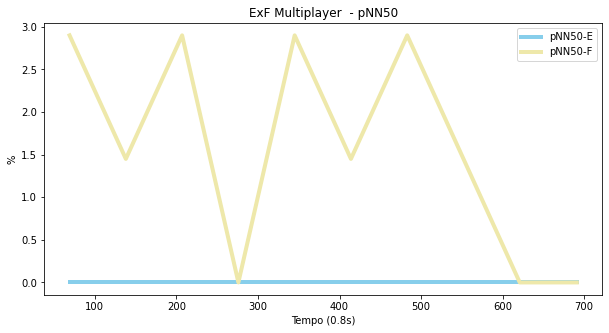

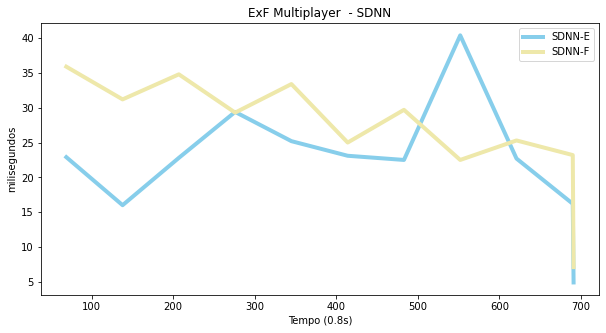

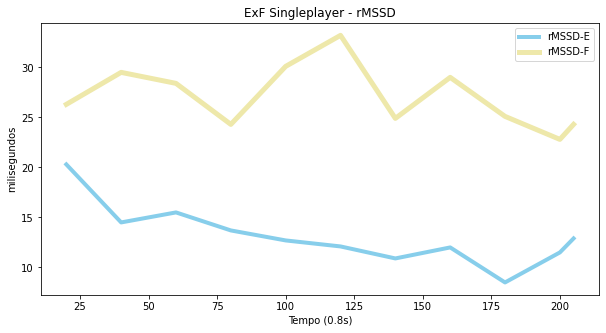

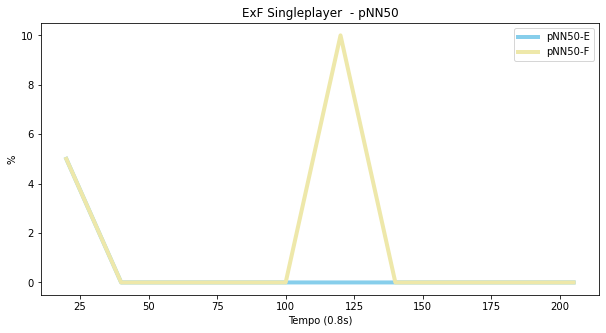

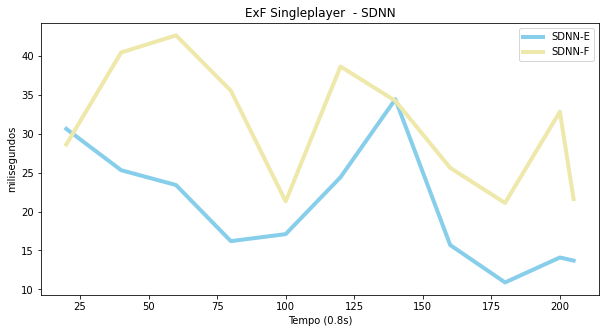

In [183]:
path = glob.glob('../Data/Processed/*.csv')

for i in range(6):
    
    ts = pd.read_csv(dict_['path'][i])
    player1 = dict_['player1'][i]
    player2 = dict_['player2'][i]
    modo = dict_['modo'][i]
    size = ts.shape[0] // 10

    resumo = pd.DataFrame()
    for i in range(0, ts.shape[0], size):
        a = ts.loc[i:i+size, f'RR_{player1}'].reset_index(drop = True)
        Apnn50 = getPNN50(a)
        Asdnn  = getSDNN (a)
        Armssd = getRMSSD(a)

        b = ts.loc[i:i+size, f'RR_{player2}'].reset_index(drop = True)
        Bpnn50 = getPNN50(b)
        Bsdnn  = getSDNN (b)
        Brmssd = getRMSSD(b)
        r = {'From' : i, 'To' : i + b.shape[0] - 1, 'Participante' : player1, f'pNN50-{player1}' : Apnn50,
             f'SDNN-{player1}' : Asdnn, f'rMSSD-{player1}' : Armssd,
            'Participante' : player2, f'pNN50-{player2}' : Bpnn50, f'SDNN-{player2}' : Bsdnn, f'rMSSD-{player2}' : Brmssd}

        resumo = pd.concat([resumo, pd.DataFrame(r, index = [0])], ignore_index = True)

    # rMSSD
    plt.figure(figsize=(10,5))
    plt.plot('To', f'rMSSD-{player1}',  data=resumo, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.plot( 'To', f'rMSSD-{player2}',  data=resumo, marker='', markerfacecolor='olive', markersize=12, color='palegoldenrod', linewidth=5)
    plt.legend()
    plt.xlabel('Tempo (0.8s)')
    plt.ylabel('milisegundos')
    title = f'{player1}x{player2} {modo} - rMSSD'
    plt.title(title)
    plt.savefig(f'../Graphs/rMSSD/{title}')


    # PNN50
    plt.figure(figsize=(10,5))
    plt.plot('To', f'pNN50-{player1}',  data=resumo, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.plot( 'To', f'pNN50-{player2}',  data=resumo, marker='', markerfacecolor='olive', markersize=12, color='palegoldenrod', linewidth=4)
    plt.legend()
    plt.xlabel('Tempo (0.8s)')
    plt.ylabel('%')
    title = f'{player1}x{player2} {modo}  - pNN50'
    plt.title(title)
    plt.savefig(f'../Graphs/pNN50/{title}')

    # SDNN
    plt.figure(figsize=(10,5))
    plt.plot('To', f'SDNN-{player1}',  data=resumo, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.plot( 'To', f'SDNN-{player2}',  data=resumo, marker='', markerfacecolor='olive', markersize=12, color='palegoldenrod', linewidth=4)
    plt.legend()
    plt.xlabel('Tempo (0.8s)')
    plt.ylabel('milisegundos')
    title = f'{player1}x{player2} {modo}  - SDNN'
    plt.title(title)
    plt.savefig(f'../Graphs/SDNN/{title}')